### Importing Libraries 

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [17]:
store = pd.read_excel('../../DataFile/SuperStoreUS.xlsx')

In [4]:
mean_base_margin = store["Product Base Margin"].mean()
store.fillna({'Product Base Margin' : 'mean_base_margin'}, inplace=True)

In [42]:
store.transpose().count()

0       25
1       25
2       25
3       25
4       25
        ..
1947    25
1948    25
1949    25
1950    25
1951    25
Length: 1952, dtype: int64

In [43]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                1952 non-null   int64         
 1   Order Priority        1952 non-null   object        
 2   Discount              1952 non-null   float64       
 3   Unit Price            1952 non-null   float64       
 4   Shipping Cost         1952 non-null   float64       
 5   Customer ID           1952 non-null   int64         
 6   Customer Name         1952 non-null   object        
 7   Ship Mode             1952 non-null   object        
 8   Customer Segment      1952 non-null   object        
 9   Product Category      1952 non-null   object        
 10  Product Sub-Category  1952 non-null   object        
 11  Product Container     1952 non-null   object        
 12  Product Name          1952 non-null   object        
 13  Product Base Margi

In [44]:
store.describe()

,Row ID,Discount,Unit Price,Shipping Cost,Customer ID,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952,1952,1952.000000,1952.000000,1952.000000,1952.000000
mean,19916.479508,0.048975,109.079221,12.968151,1735.376537,51534.769467,2015-03-29 01:21:08.852459008,2015-03-30 23:55:34.426229248,114.793859,12.944672,985.828832,82365.924180
min,64.000000,0.000000,1.140000,0.490000,3.000000,1001.000000,2015-01-01 00:00:00,2015-01-02 00:00:00,-16476.838000,1.000000,2.250000,359.000000
25%,19121.000000,0.020000,6.480000,3.230000,875.000000,28560.000000,2015-02-11 00:00:00,2015-02-13 00:00:00,-84.485400,5.000000,58.807500,86767.750000
50%,21164.500000,0.050000,20.990000,6.150000,1738.000000,48765.500000,2015-03-27 12:00:00,2015-03-29 00:00:00,1.476450,10.000000,202.395000,88376.000000
75%,23483.250000,0.080000,100.972500,14.362500,2578.250000,78550.000000,2015-05-15 00:00:00,2015-05-16 00:00:00,116.201575,16.000000,802.945000,89957.000000
max,26389.000000,0.210000,6783.020000,164.730000,3403.000000,99362.000000,2015-06-30 00:00:00,2015-07-08 00:00:00,9228.225600,167.000000,45737.330000,91586.000000
std,5957.595627,0.031378,393.481301,17.414631,991.078006,29362.828420,NaN,NaN,1141.112387,13.871565,2559.900167,19042.295798


In [45]:
# type of customers
customer = store['Customer Segment'].unique()
customer

array(['Corporate', 'Home Office', 'Small Business', 'Consumer'],
      dtype=object)

In [42]:
# number of custormer in each segment
Num_of_customer = store['Customer Segment'].value_counts().reset_index()
Num_of_customer = Num_of_customer.rename(columns ={'Customer Segment':'Customer Type','count':'Total Customer'})

(Num_of_customer)

,Customer Type,Total Customer
0,Corporate,684
1,Home Office,470
2,Consumer,410
3,Small Business,388


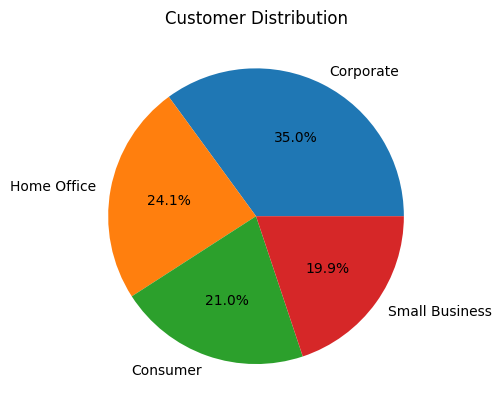

In [43]:
plt.pie(Num_of_customer['Total Customer'], labels=Num_of_customer['Customer Type'], autopct='%1.1f%%')
plt.title('Customer Distribution')
plt.show()

# Customer and Sales

In [46]:
Sales_per_category = store.groupby('Customer Segment')['Sales'].sum().reset_index()
Sales_per_category = Sales_per_category.rename(columns = {'Customer Segment': 'Customer Type','Sales':'Total Sales'})
Sales_per_category

,Customer Type,Total Sales
0,Consumer,401778.37
1,Corporate,657784.53
2,Home Office,464481.04
3,Small Business,400293.94


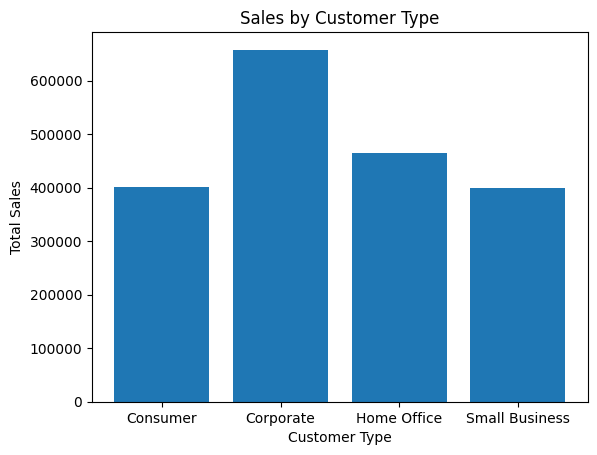

In [51]:
plt.bar(Sales_per_category['Customer Type'],Sales_per_category['Total Sales'])
plt.title('Sales by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Total Sales')
plt.show()

In [48]:
customer_order_freq = store.groupby(['Customer ID','Customer Name','Customer Segment'])['Order ID'].count().reset_index()
customer_order_freq.rename(columns={'Order ID':'Total Order'},inplace=True)
repeat_customer = customer_order_freq[customer_order_freq['Total Order']>=1]
sort_repeat_cust = customer_order_freq.sort_values(by='Total Order',ascending=False)
top_rp_customer = sort_repeat_cust.head(10).reset_index(drop=True)
top_rp_customer

,Customer ID,Customer Name,Customer Segment,Total Order
0,699,Jenny Gold,Consumer,9
1,2882,Andrew Gonzalez,Consumer,8
2,3079,Andrew Levine,Small Business,7
3,3151,Glenda Hunter,Corporate,6
4,2618,Amy Hamrick Melvin,Corporate,6
5,3133,Kristine Singleton,Corporate,6
6,693,Richard McClure,Small Business,5
7,2157,Tom Hoyle Honeycutt,Home Office,5
8,698,Nelson Hensley,Corporate,5
9,1821,Vanessa Boyer,Consumer,5


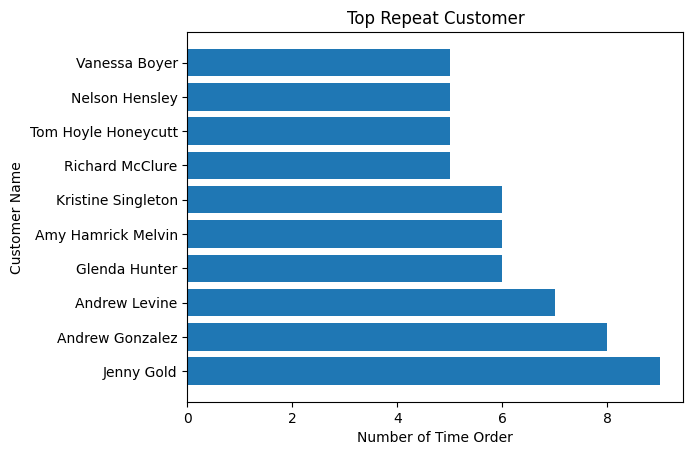

In [52]:
plt.barh(top_rp_customer['Customer Name'],top_rp_customer['Total Order'])
plt.title('Top Repeat Customer')
plt.xlabel('Number of Time Order')
plt.ylabel('Customer Name')
plt.show()

In [4]:
# Group data based on Customer ID,Customer Name and Sales
customer_sales = store.groupby(['Customer ID','Customer Name'])['Sales'].sum().reset_index()
customer_sales.rename(columns ={'Sales':'Total Sales'},inplace=True)
top_spenders = customer_sales.sort_values(by='Total Sales',ascending=False)
top_spenders = top_spenders.head(10).reset_index(drop=True)
# print(top_spenders.head(10))


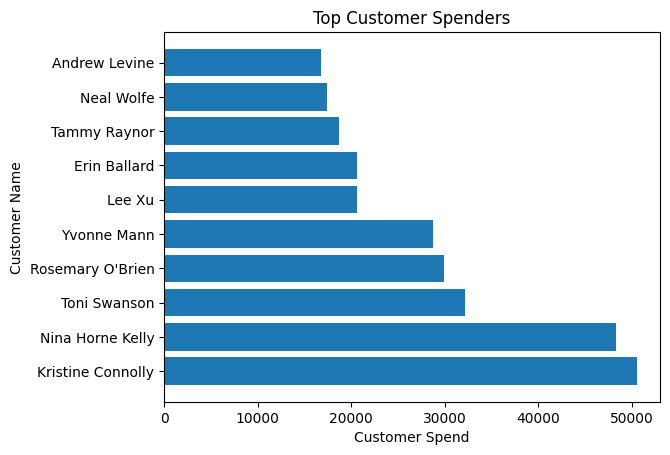

In [6]:
plt.barh(top_spenders['Customer Name'],top_spenders['Total Sales'])
plt.title('Top Customer Spenders')
plt.xlabel('Customer Spend')
plt.ylabel('Customer Name')
plt.show()

# Mode of Shipping

In [21]:
# Unique shipping mode from column
type_of_shipping = store['Ship Mode'].unique()
type_of_shipping

array(['Express Air', 'Delivery Truck', 'Regular Air'], dtype=object)

In [32]:
# Frequency use shipping method
shipping_mode = store['Ship Mode'].value_counts().reset_index()
shipping_mode = shipping_mode.rename(columns={'count':'Use Frequency'})
print(shipping_mode)

        Ship Mode  Use Frequency
0     Regular Air           1437
1  Delivery Truck            275
2     Express Air            240


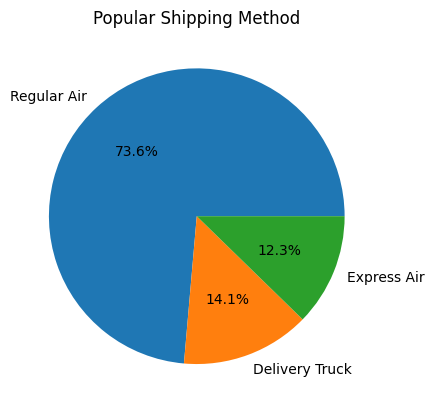

In [33]:
# Plotting pie chart
plt.pie(shipping_mode['Use Frequency'],labels=shipping_mode['Ship Mode'], autopct='%1.1f%%')
plt.title('Popular Shipping Method')
plt.show()

In [39]:
# Custome by state
state= store['State or Province'].value_counts().reset_index()
state = state.rename(columns={'index':'Mode of Shippment','count':'Number of Customer'})
print(state.head(7))

  State or Province  Number of Customer
0        California                 214
1          New York                 129
2             Texas                 124
3           Florida                 123
4          Illinois                  88
5              Ohio                  81
6          Michigan                  66


In [53]:
# Sales per state
# grouping state and sales
state_sales = store.groupby(['State or Province'])['Sales'].sum().reset_index()

# sorting 
top_state_sales = state_sales.sort_values(by='Sales',ascending=False)
print(top_state_sales.head(10).reset_index(drop=True))

      State or Province      Sales
0            California  288310.61
1              New York  223930.48
2              Illinois   98971.25
3                 Texas   93082.73
4               Florida   87651.11
5            Washington   83468.06
6              Michigan   69641.81
7                  Ohio   69452.82
8  District of Columbia   68946.66
9         Massachusetts   59114.82


In [38]:
# Customer by City
city= store['City'].value_counts().reset_index()
city = city.rename(columns={'index':'Mode of Shippment','count':'Number of Customer'})
print(city.head(7))

            City  Number of Customer
0  New York City                  47
1    Los Angeles                  44
2        Seattle                  21
3         Boston                  19
4     Washington                  15
5      Charlotte                  12
6   Philadelphia                  12


In [6]:
# Sales per City
# grouping City and sales
City_sales = store.groupby(['City'])['Sales'].sum().reset_index()

# sorting 
top_city_sales = City_sales.sort_values(by='Sales',ascending=False)
top_city_sales = top_city_sales.head(10).reset_index(drop=True)

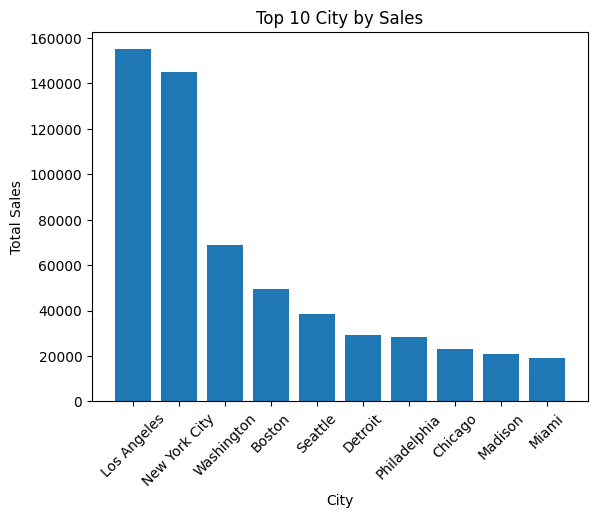

In [7]:
plt.bar(top_city_sales['City'],top_city_sales['Sales'])
plt.xticks(rotation=45)
plt.title('Top 10 City by Sales')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.show()

In [8]:
# Customer by Region
region= store['Region'].value_counts().reset_index()
region = region.rename(columns={'index':'Mode of Shippment','count':'Number of Customer'})
print(region)

    Region  Number of Customer
0  Central                 566
1     East                 474
2     West                 470
3    South                 442


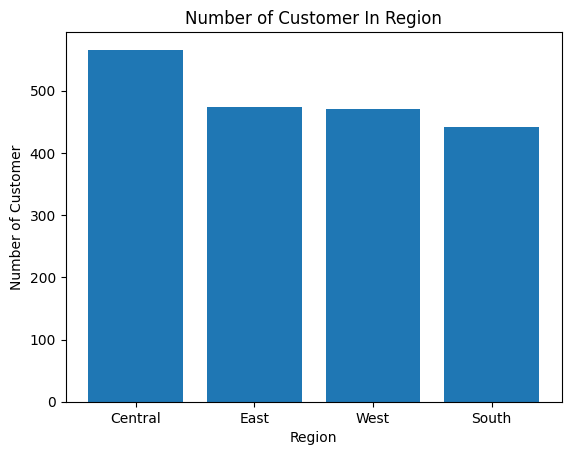

In [9]:
plt.bar(region['Region'],region['Number of Customer'])
plt.title('Number of Customer In Region')
plt.xlabel('Region')
plt.ylabel('Number of Customer')
plt.show()

In [11]:
# Sales per Region
# grouping Region and sales
Region_sales = store.groupby(['Region'])['Sales'].sum().reset_index()

# sorting 
top_Region_sales = Region_sales.sort_values(by='Sales',ascending=False)
print(top_Region_sales.reset_index(drop=True))

    Region      Sales
0     East  592171.49
1     West  526776.57
2  Central  448284.70
3    South  357105.12


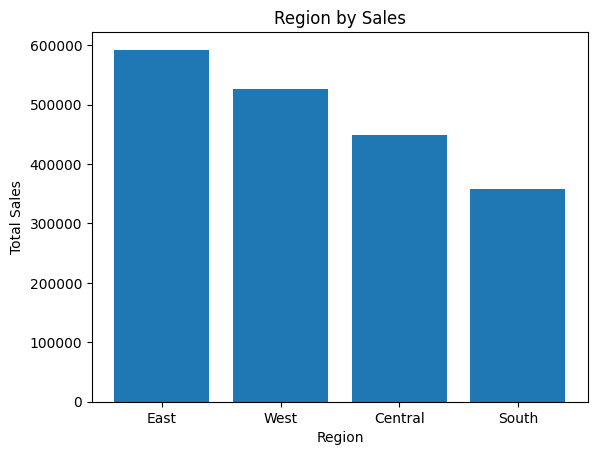

In [12]:
plt.bar(top_Region_sales['Region'],top_Region_sales['Sales'])
plt.title('Region by Sales')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

# Product

In [14]:
product = store['Product Name'].unique()
product = store.groupby('Product Name')['Sales'].sum().reset_index()
top_product = product.sort_values(by='Sales',ascending=False).head(10).reset_index(drop=True)
top_product

,Product Name,Sales
0,Fellowes PB500 Electric Punch Plastic Comb Bin...,69013.48
1,Lexmark 4227 Plus Dot Matrix Printer,61071.73
2,Global Troy™ Executive Leather Low-Back Tilter,50871.21
3,Okidata ML395C Color Dot Matrix Printer,47611.09
4,Polycom ViewStation™ ISDN Videoconferencing Unit,46538.69
5,Economy Rollaway Files,35607.28
6,Smead Adjustable Mobile File Trolley with Lock...,23995.11
7,Hon 4700 Series Mobuis™ Mid-Back Task Chairs w...,22554.43
8,SAFCO PlanMaster Heigh-Adjustable Drafting Tab...,21253.25
9,"Riverside Palais Royal Lawyers Bookcase, Royal...",20915.17


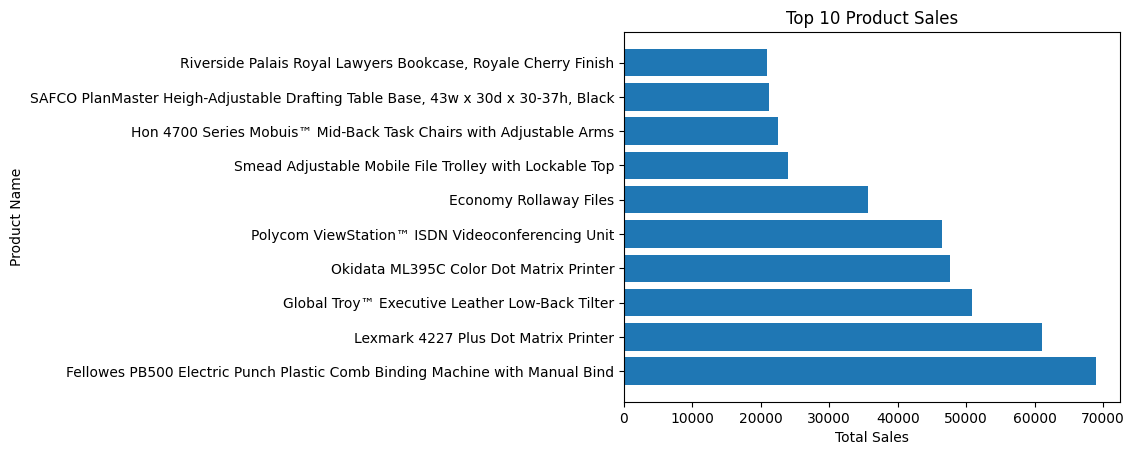

In [15]:
plt.barh(top_product['Product Name'],top_product['Sales'])
plt.title('Top 10 Product Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.show()

In [61]:
# Types of product category

product_category = store['Product Category'].unique()
print(product_category)

['Office Supplies' 'Furniture' 'Technology']


In [69]:
# group data by product category
subcategory_count = store.groupby('Product Category')['Product Sub-Category'].nunique().reset_index()
subcategory_count = subcategory_count.sort_values(by='Product Sub-Category',ascending=False)
subcategory_count.reset_index(drop=True)

,Product Category,Product Sub-Category
0,Office Supplies,9
1,Furniture,4
2,Technology,4


In [71]:
category_sales = store.groupby(['Product Category'])['Sales'].sum().reset_index()
category_sales = category_sales.sort_values(by='Sales',ascending=False)
category_sales

,Product Category,Sales
2,Technology,712264.95
0,Furniture,660704.31
1,Office Supplies,551368.62


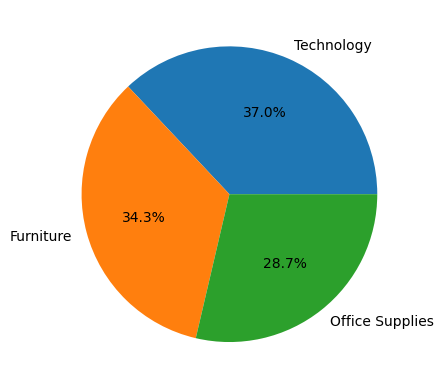

In [72]:
# Plotting pie chart
plt.pie(category_sales['Sales'],labels=category_sales['Product Category'],autopct='%1.1f%%')
plt.show()

In [6]:
# 
subcategory_sales = store.groupby(['Product Sub-Category'])['Sales'].sum().reset_index()
subcategory_sales = subcategory_sales.sort_values(by='Sales',ascending=False)
subcategory_sales.reset_index(drop=True)

,Product Sub-Category,Sales
0,Office Machines,318169.68
1,Chairs & Chairmats,261072.73
2,Telephones and Communication,198764.49
3,Tables,193764.58
4,Binders and Binder Accessories,185928.14
5,Storage & Organization,177417.60
6,Bookcases,107796.09
7,Copiers and Fax,99069.48
8,Office Furnishings,98070.91
9,Computer Peripherals,96261.30


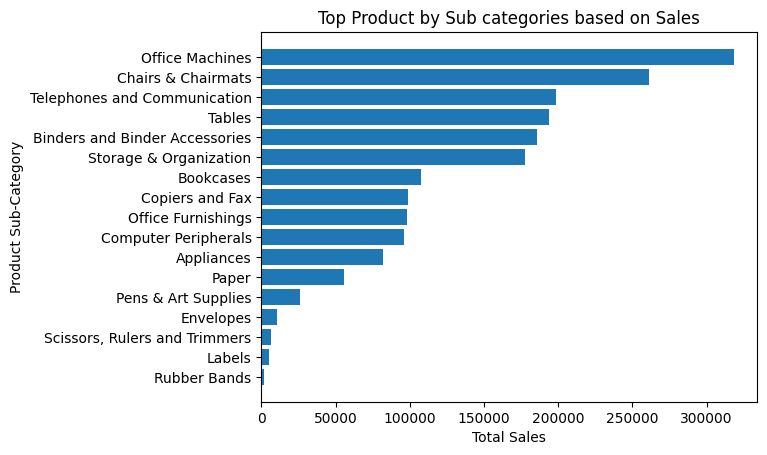

In [8]:
subcategory_sales = subcategory_sales.sort_values(by='Sales',ascending=True)

plt.barh(subcategory_sales['Product Sub-Category'],subcategory_sales['Sales'])
plt.title('Top Product by Sub categories based on Sales')
plt.ylabel('Product Sub-Category')
plt.xlabel('Total Sales')
plt.show()

In [27]:
store['Order Date'] = pd.to_datetime(store['Order Date'], dayfirst=True)
store['Month-Year'] = store['Order Date'].dt.strftime('%b-%Y')
monthly_sales = store.groupby('Month-Year')['Sales'].sum()
monthly_sales = monthly_sales.reset_index()
monthly_sales['Month-Year'] = pd.to_datetime(monthly_sales['Month-Year'], format='%b-%Y')

monthly_sales = monthly_sales.sort_values(by='Month-Year')
print(month_year_sales)

  Month-Year      Sales
0 2015-01-01  274766.92
1 2015-02-01  326101.47
2 2015-03-01  271696.67
3 2015-04-01  389831.95
4 2015-05-01  306572.07
5 2015-06-01  355368.80


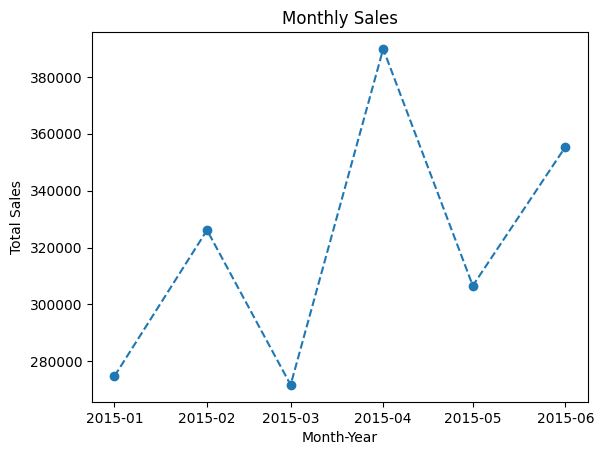

In [30]:

plt.plot(monthly_sales['Month-Year'],monthly_sales['Sales'],marker='o',linestyle='--')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.title('Monthly Sales')
plt.show()